In [10]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

In [11]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpy_image = sitk.GetArrayFromImage(itkimage)
    
    numpy_origin = np.array(list(reversed(itkimage.GetOrigin())))
    # size of pixels
    numpy_spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return numpy_image, numpy_origin, numpy_spacing

In [32]:
def readcsv(filename):
    lines = []
    with open(filename, "rt") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

In [33]:
# world coordinates = real-life, voxel = in arrays
def world_to_voxel(world_coord, origin, spacing):
    # think this is OK due to 2-D nature of images and origin is botLeft?
    stretched_voxel_coord = np.absolute(world_coord - origin)
    voxel_coord = stretched_voxel_coord / spacing
    return voxel_coord

In [34]:
def normalize_planes(npzarray):
    maxHU = 400.
    minHU = -1000.
    
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray > 1] = 1.
    npzarray[npzarray < 0] = 0.
    return npzarray

In [86]:
# visualize patch and save it
def preprocess(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(numpy_image.shape)
    print(numpy_origin)
    print(numpy_spacing)
    
    #load candidates (points where nodules are centered)
    cands = readcsv(cand_path)
    for cand in cands[1:10]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
        output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))

(538, 512, 512)
[-298.774994 -143.100006 -180.600006]
[ 0.625       0.74218798  0.74218798]
[-288.7   -74.48   68.42]
[  16.1199904    92.45636974  335.52147673]
[[ 0.67928571  0.615       0.62285714 ...,  0.66285714  0.61428571
   0.59214286]
 [ 0.67071429  0.60857143  0.61214286 ...,  0.67142857  0.62142857
   0.62857143]
 [ 0.66428571  0.655       0.65285714 ...,  0.63357143  0.65285714
   0.69071429]
 ..., 
 [ 0.70785714  0.62714286  0.63142857 ...,  0.55857143  0.60142857
   0.63714286]
 [ 0.54142857  0.57285714  0.62071429 ...,  0.66071429  0.66928571
   0.61357143]
 [ 0.65285714  0.62357143  0.63214286 ...,  0.66785714  0.61071429
   0.52142857]]


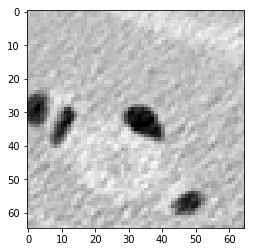

[-377.4263503   -91.80940617  -95.20936148]
[ 125.84217008   69.10729011  115.05258396]
[[ 0.          0.          0.         ...,  0.06357143  0.04071429
   0.00571429]
 [ 0.          0.          0.         ...,  0.01357143  0.05285714
   0.00142857]
 [ 0.          0.          0.         ...,  0.          0.01571429
   0.00285714]
 ..., 
 [ 0.61285714  0.595       0.63357143 ...,  0.70214286  0.73714286  0.68      ]
 [ 0.63428571  0.60428571  0.57571429 ...,  0.6         0.64214286
   0.66642857]
 [ 0.64928571  0.67285714  0.60785714 ...,  0.67714286  0.60142857
   0.58357143]]


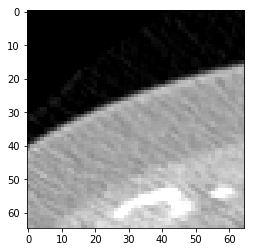

[-273.3615387  -120.3792939   -24.76675476]
[  40.66152848   30.61315032  209.96466677]
[]


/Users/kanetian7/anaconda3/envs/Projects/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


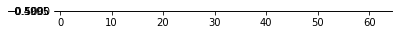

[-344.24  -65.74  -63.08]
[  72.7440096   104.23236217  158.3426432 ]
[[ 0.61214286  0.62428571  0.65714286 ...,  0.72142857  0.67357143
   0.62714286]
 [ 0.65642857  0.60214286  0.60214286 ...,  0.60714286  0.67285714  0.645     ]
 [ 0.705       0.64714286  0.58571429 ...,  0.62642857  0.65785714
   0.62785714]
 ..., 
 [ 0.76714286  0.80571429  0.85357143 ...,  0.76857143  0.77357143
   0.78785714]
 [ 0.78571429  0.77285714  0.83071429 ...,  0.76        0.755       0.73      ]
 [ 0.735       0.77857143  0.78785714 ...,  0.71571429  0.79285714
   0.78571429]]


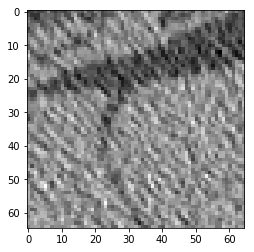

[-241.067872    -92.68887262   52.94668794]
[  92.3313952    67.92232555  314.67323809]
[[ 0.03928571  0.          0.         ...,  0.05857143  0.00428571  0.005     ]
 [ 0.08571429  0.          0.00428571 ...,  0.04071429  0.          0.        ]
 [ 0.33642857  0.21571429  0.24642857 ...,  0.02071429  0.          0.00571429]
 ..., 
 [ 0.69857143  0.63285714  0.66642857 ...,  0.625       0.59285714
   0.66357143]
 [ 0.63142857  0.665       0.67214286 ...,  0.62642857  0.59142857
   0.63357143]
 [ 0.65642857  0.64714286  0.61642857 ...,  0.63428571  0.63571429
   0.63428571]]


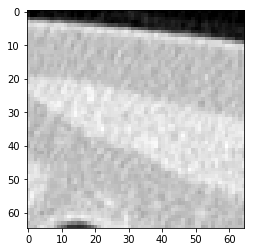

[-249.5945431  -104.8118604    54.65773103]
[  78.68872144   51.58820514  316.97864203]
[[ 0.03071429  0.          0.02       ...,  0.          0.          0.00642857]
 [ 0.          0.          0.         ...,  0.          0.          0.025     ]
 [ 0.          0.          0.02357143 ...,  0.          0.01142857
   0.01785714]
 ..., 
 [ 0.65928571  0.70785714  0.69642857 ...,  0.76071429  0.80428571
   0.77285714]
 [ 0.65714286  0.66071429  0.59857143 ...,  0.74        0.82428571  0.8       ]
 [ 0.65714286  0.625       0.61285714 ...,  0.73642857  0.78571429
   0.71285714]]


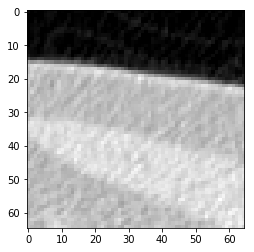

[-333.76 -138.79  134.73]
[  55.9760096     5.80716225  424.86541933]
[]


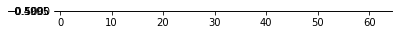

[-379.787441    -84.7526841    84.80405524]
[ 129.6199152    78.61528847  357.59682119]
[[  2.78571429e-02   7.14285714e-04   7.85714286e-03 ...,   0.00000000e+00
    0.00000000e+00   5.00000000e-03]
 [  7.50000000e-02   4.78571429e-02   4.57142857e-02 ...,   0.00000000e+00
    3.57142857e-03   9.28571429e-03]
 [  7.64285714e-02   6.50000000e-02   8.78571429e-02 ...,   0.00000000e+00
    0.00000000e+00   7.14285714e-04]
 ..., 
 [  7.49285714e-01   7.55000000e-01   7.77857143e-01 ...,   7.16428571e-01
    7.57142857e-01   8.30714286e-01]
 [  6.84285714e-01   6.81428571e-01   6.84285714e-01 ...,   8.00000000e-01
    8.04285714e-01   8.15000000e-01]
 [  6.75000000e-01   7.25000000e-01   7.67142857e-01 ...,   8.35714286e-01
    7.77857143e-01   8.34285714e-01]]


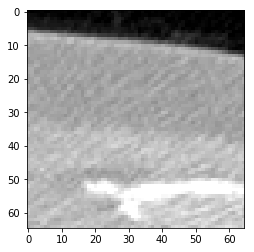

[-258.23 -171.11  -76.47]
[  64.8719904    37.73975714  140.30139163]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.64857143  0.61857143  0.64285714 ...,  0.75642857  0.73214286
   0.68785714]
 [ 0.7         0.67214286  0.66857143 ...,  0.74071429  0.75642857  0.695     ]
 [ 0.71857143  0.65642857  0.68285714 ...,  0.69571429  0.74928571
   0.73857143]]


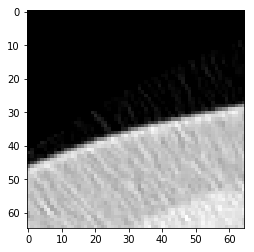

In [87]:
preprocess('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd', 
                '/Users/kanetian7/LUNA16/data/candidates_V2.csv')